# Getting started

## Installation

To install `cosmologix`, you need Python 3.10 or newer. Use pip:

```sh
pip install cosmologix
```

Note: Make sure you have JAX installed, along with its dependencies. If you're using GPU acceleration, ensure CUDA and cuDNN are properly set up.

## Command line interface

For most common use cases, there is a simple command line interface to the library. You can perform fit, contour exploration and contour plotting as follows:

In [4]:
! cosmologix fit --priors PR4 --priors DESIDR2 --cosmology FwCDM -s
! cosmologix explore Omega_bc w --priors PR4 --priors DESIDR2 --cosmology FwCDM -o contours.pkl
! cosmologix contour contours.pkl -s -o contour.png

/usr/lib/python3.12/pty.py:95: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Cache directory does not exist: /home/betoule/.cache/cosmologix/jit
Omega_bc = 0.2949 ± 0.0076
H0 = 68.99 ± 0.98
Omega_b_h2 = 0.02236 ± 0.00013
w = -1.027 ± 0.041
χ²=14.34 (d.o.f. = 12), χ²/d.o.f = 1.195
p-value: 27.94%
Figure(1000x1000)
Cache directory does not exist: /home/betoule/.cache/cosmologix/jit
Exploring contour ['Omega_bc', 'w'] (upper bound estimate):   2%| | 30/1566 [00:
Contour data saved to contours.pkl
Cache directory does not exist: /home/betoule/.cache/cosmologix/jit
Contour plot saved to contour.png
Figure(640x480)


## High level interface

All commands available from the command line have their equivalent accessible in python as follows:

Omega_bc = 0.2949 ± 0.0076
H0 = 68.99 ± 0.98
Omega_b_h2 = 0.02236 ± 0.00013
w = -1.027 ± 0.041
χ²=14.34 (d.o.f. = 12), χ²/d.o.f = 1.195
p-value: 27.94%


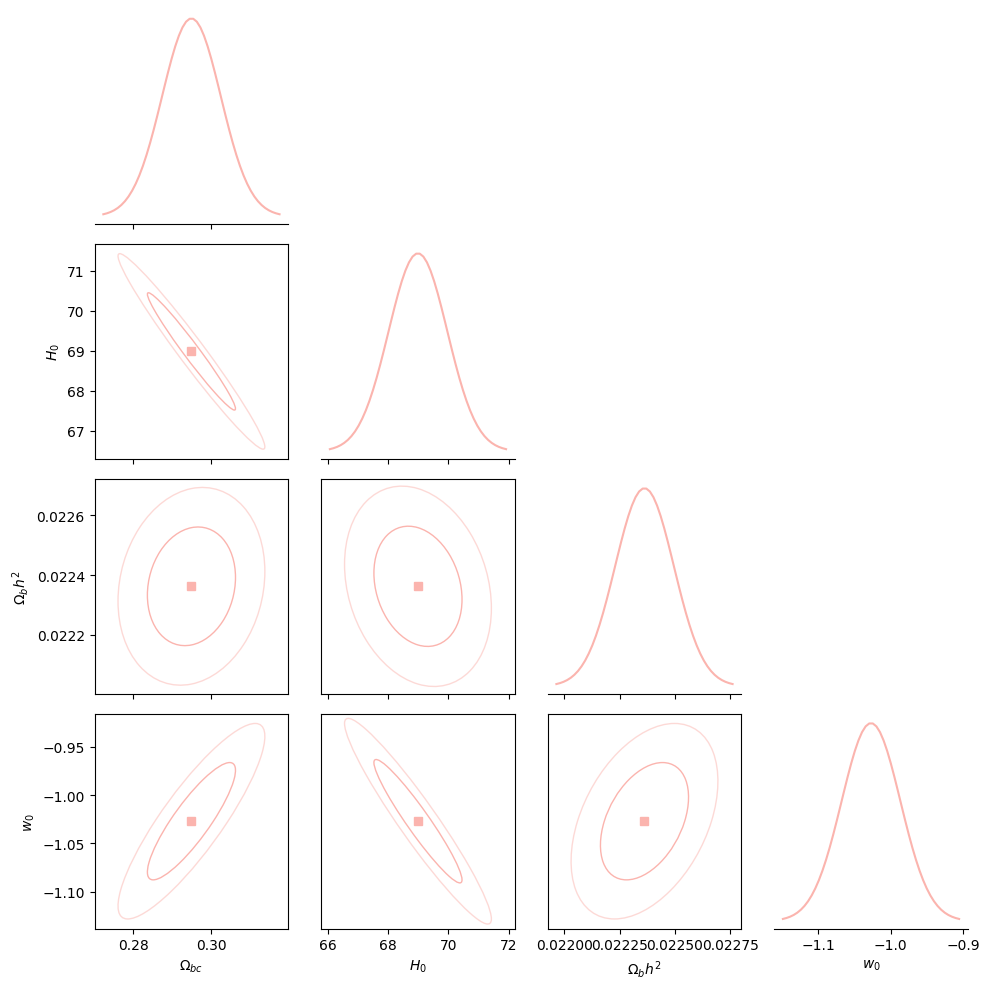

In [1]:
from cosmologix import cli
bestfit = cli.fit(prior_names=['PR4', 'DESIDR2'], cosmology='FwCDM', show=True)

Exploring contour (upper bound estimate): 17it [00:00, 18.90it/s]                                                                                                                                                  
Exploring contour ['Omega_bc', 'H0'] (upper bound estimate):   3%|██▊                                                                                                            | 91/3556 [00:01<01:08, 50.76it/s]
Exploring contour ['Omega_bc', 'w'] (upper bound estimate):   2%|██▌                                                                                                             | 98/4387 [00:01<01:08, 62.79it/s]
Exploring contour (upper bound estimate): 30it [00:00, 31.99it/s]                                                                                                                                                  
Exploring contour ['H0', 'w'] (upper bound estimate):   4%|████▎                                                                                        

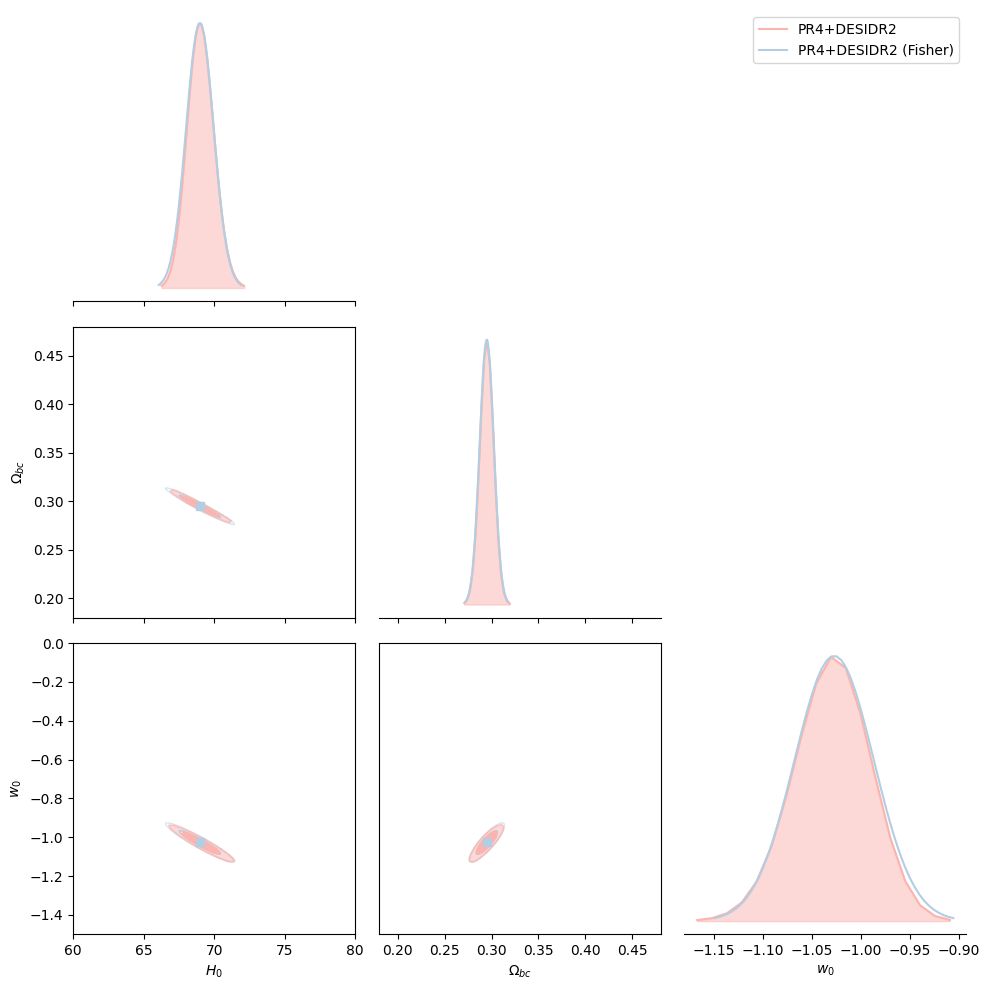

In [4]:
results = cli.explore(['Omega_bc', 'H0', 'w'], prior_names=['PR4', 'DESIDR2'], resolution=100)
cli.corner([results, bestfit])


## Low level interface
If you need more control on the plots or more basic tasks, you can use directly the core library. Here's a quick example to get you started (look at
[example/features.py](https://gitlab.in2p3.fr/lemaitre/cosmologix/-/blob/master/examples/features.py)
for a more complete tour of the available features):

In [5]:
from cosmologix import distances, parameters
import jax.numpy as jnp

In [6]:
# Best-fit parameters to Planck 2018 are:
print(parameters.Planck18)

{'Tcmb': 2.7255, 'Omega_bc': 0.31315017687047186, 'H0': 67.37, 'Omega_b_h2': 0.02233, 'Omega_k': 0.0, 'w': -1.0, 'wa': 0.0, 'm_nu': 0.06, 'Neff': 3.046}


In [7]:
# Redshift values for supernovae
z_values = jnp.linspace(0.1, 1.0, 10)

# Compute distance modulus 
distance_modulus = distances.mu(parameters.Planck18, z_values)
print(distance_modulus)

[38.39599686 40.03474604 41.03170593 41.75860618 42.33336668 42.80935305
 43.21557803 43.56971025 43.88337776 44.1646754 ]


In [ ]:
# Find bestfit flat w-CDM cosmology
from cosmologix import likelihoods, fitter
priors = [likelihoods.Planck2018(), likelihoods.DES5yr()]
fixed = {'Omega_k':0., 'm_nu':0.06, 'Neff':3.046, 'Tcmb': 2.7255, 'wa':0.0}

result = fitter.fit(priors, fixed=fixed, verbose=True)
print(result['bestfit'])

Using cached file: /home/betoule/.cache/cosmologix/func_cache_DES5yr
{'Omega_bc': 0.31315017687047186, 'H0': 67.37, 'Omega_b_h2': 0.02233, 'w': -1.0, 'M': 0.0}


In [ ]:
#Compute frequentist confidence contours. 

from cosmologix import contours, display
grid = contours.frequentist_contour_2d_sparse(
    priors,
    grid={'Omega_bc': [0.18, 0.48, 30], 'w': [-0.6, -1.5, 30]},
    fixed=fixed
    )


The progress bar provides a rough upper bound on computation time because the actual size of the explored region is unknown at the start of the calculation.

Improvements to this feature are planned.


In [ ]:
import matplotlib.pyplot as plt
display.plot_contours(grid, filled=True, label='CMB+SN')
plt.ion()
plt.legend(loc='lower right', frameon=False)
plt.show()

Further examples can be found reading files in the examples directory, especially [example/features.py](https://gitlab.in2p3.fr/lemaitre/cosmologix/-/blob/master/examples/features.py).